In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline  




In [2]:
img = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')  
img.shape

(225, 225, 3)

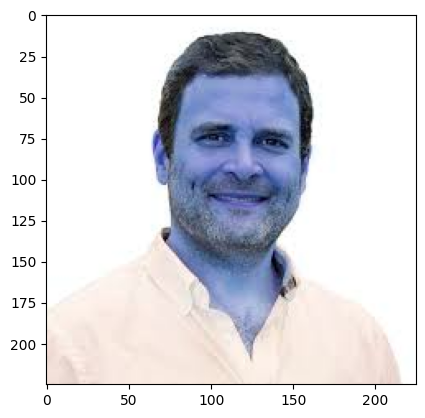

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 68,  36, 103, 103]])

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(68, 36, 103, 103)

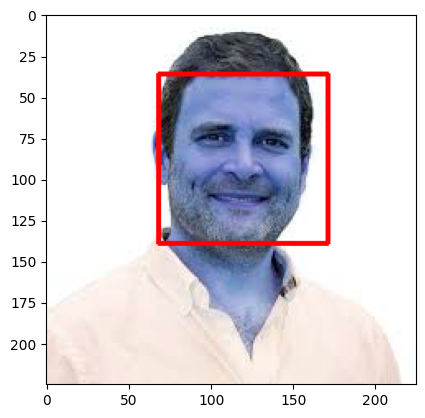

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

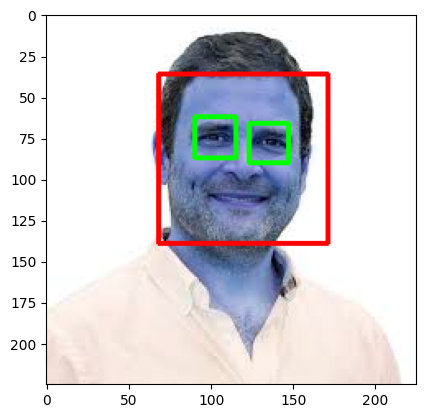

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

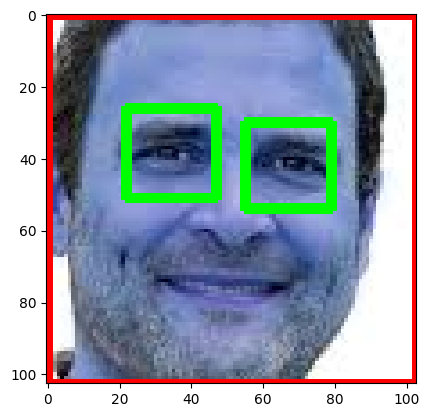

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

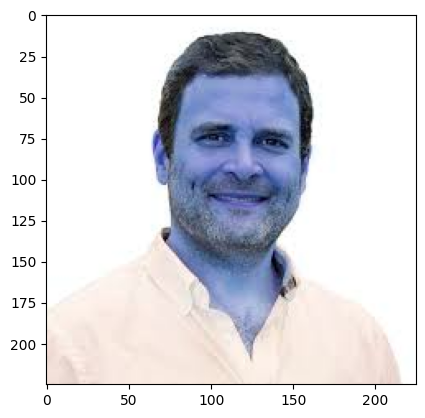

In [11]:
original_image = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')
plt.imshow(original_image)

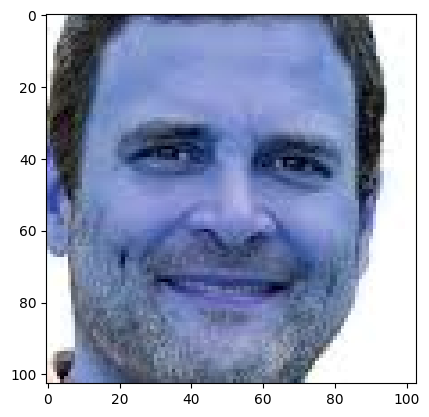

In [12]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')
plt.imshow(cropped_image)

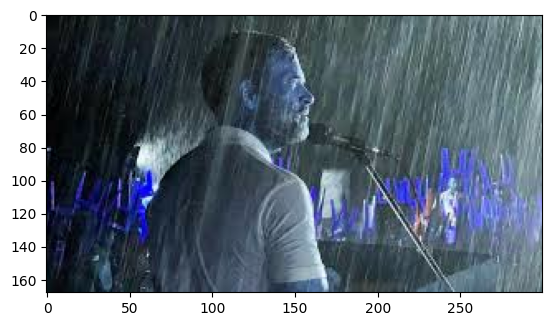

In [13]:
org_image_obstructed = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image2.jpg')
plt.imshow(org_image_obstructed)

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image2.jpg')
cropped_image_no_2_eyes

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs


['./dataset/akshay kumar',
 './dataset/cristiano ronaldo',
 './dataset/cropped',
 './dataset/ms dhoni',
 './dataset/rahul gandhi',
 './dataset/sachin tendulkar']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

# Rest of your code remains the same
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        # Optional: Skip non-image files if needed
        if not entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
            
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
                
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

akshay kumar
Generating cropped images in folder: ./dataset/cropped/akshay kumar
cristiano ronaldo
Generating cropped images in folder: ./dataset/cropped/cristiano ronaldo
cropped
ms dhoni
Generating cropped images in folder: ./dataset/cropped/ms dhoni
rahul gandhi
Generating cropped images in folder: ./dataset/cropped/rahul gandhi
sachin tendulkar
Generating cropped images in folder: ./dataset/cropped/sachin tendulkar
